<h1> Network analysis in Python </h1>
<p>Finding a shortest path using a specific street network is a common GIS problem that has many practical applications. For example navigators are one of those “every-day” applications where routing using specific algorithms is used to find the optimal route between two (or multiple) points.

It is also possible to perform network analysis such as tranposrtation routing in Python. Networkx is a Python module that provides tools for analyzing networks in various different ways. It also contains algorithms such as Dijkstra’s algorithm or A* algoritm that are commonly used to find shortest paths along transportation network.

To be able to conduct network analysis, it is, of course, necessary to have a network that is used for the analyses. OSMnx package that we just explored in previous tutorial, makes it really easy to retrieve routable networks from OpenStreetMap with different transport modes (walking, cycling and driving). OSMnx also combines some functionalities from networkx module to make it straightforward to conduct routing along OpenStreetMap data.

Next we will test the routing functionalities of OSMnx by finding a shortest path between two points based on drivable roads. When fetching netowrk data from OpenStreetMap using OSMnx, it is possible to define the type of street network using the network_type parameter (options: drive, walk and bike).</p>

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

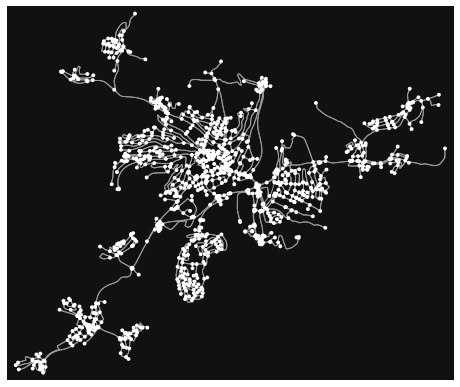

In [2]:
#Specifying type to road with "network_type".
place_name = "Bad Hersfeld, Germany"
graph = ox.graph_from_place(place_name, network_type='drive')

#Plot the graph.
fig, ax = ox.plot_graph(graph)

In [3]:
#Converting graph into a GeoDataFrame can be done with function "graph_to_gdfs()"
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

#Check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'highway', 'length', 'bridge', 'geometry',
       'ref', 'maxspeed', 'name', 'junction', 'access', 'width', 'tunnel'],
      dtype='object')

In [4]:
#Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
#Shows atribute of the GeoDataFrame
edges.head()

osmid  oneway   lanes  \
u        v          key                                           
25418736 1672439076 0     [26205482, 154751884]    True       1   
         835729234  0    [244477227, 244477230]   False  [3, 2]   
25418763 1645467926 0                 151702609    True     NaN   
         1078564751 0                 321032855    True       2   
25418770 286944742  0                  69006320    True       1   

                               highway   length bridge  \
u        v          key                                  
25418736 1672439076 0    motorway_link  165.890    yes   
         835729234  0    motorway_link   74.241    NaN   
25418763 1645467926 0     primary_link   57.815    NaN   
         1078564751 0          primary  159.550    NaN   
25418770 286944742  0     primary_link   37.067    NaN   

                                                                  geometry  \
u        v          key                                                      
25418736 1672439076 0    LINESTRING (9.72050 50.85447, 9.72037 50.85441...   
         835729234  0    LINESTRING (9.72050 50.85447, 9.72067 50.85455...   
25418763 1645467926 0    LINESTRING (9.72320 50.86227, 9.72316 50.86222...   
         1078564751 0    LINESTRING (9.72320 50.86227, 9.72322 50.86187...   
25418770 286944742  0    LINESTRING (9.72253 50.86285, 9.72270 50.86285...   

                          ref maxspeed name junction access width tunnel  
u        v          key                                                   
25418736 1672439076 0     NaN      NaN  NaN      NaN    NaN   NaN    NaN  
         835729234  0     NaN      NaN  NaN      NaN    NaN   NaN    NaN  
25418763 1645467926 0     NaN      NaN  NaN      NaN    NaN   NaN    NaN  
         1078564751 0    B 27       70  NaN      NaN    NaN   NaN    NaN  
25418770 286944742  0     NaN       50  NaN      NaN    NaN   NaN    NaN

In [6]:
#Shows the features of the columns. 
print(edges['highway'].value_counts())

residential                     1984
primary                          200
tertiary                         169
secondary                        119
unclassified                      67
primary_link                      49
living_street                     27
trunk                             19
trunk_link                        18
motorway_link                     14
[unclassified, residential]       11
tertiary_link                      9
secondary_link                     7
[residential, unclassified]        7
[living_street, residential]       4
motorway                           2
[tertiary, residential]            2
Name: highway, dtype: int64


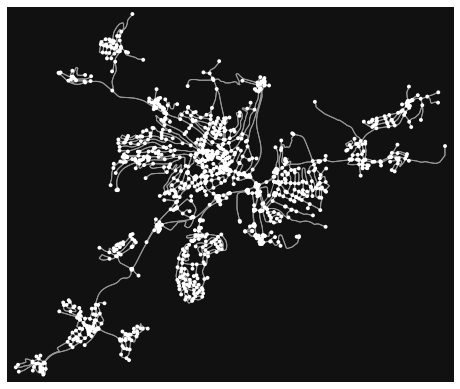

In [7]:
#Re-project WGS84 to UTM "Latitudes, Longitudes"
graph_proj = ox.project_graph(graph)

#Draw the graph with UTM coordinate system.
fig, ax = ox.plot_graph(graph_proj)

In [8]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

print("Coordinate system:", edges_proj.crs)
edges_proj.head()

Coordinate system: +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


osmid  oneway   lanes  \
u         v          key                                           
25418736  1672439076 0     [26205482, 154751884]    True       1   
          835729234  0    [244477227, 244477230]   False  [3, 2]   
835729234 25418736   0    [244477227, 244477230]   False  [2, 3]   
          2517924778 0                 244477228    True       1   
          1672439092 0                 244477229   False       2   

                                highway   length bridge  \
u         v          key                                  
25418736  1672439076 0    motorway_link  165.890    yes   
          835729234  0    motorway_link   74.241    NaN   
835729234 25418736   0    motorway_link   74.241    NaN   
          2517924778 0    motorway_link   42.861    NaN   
          1672439092 0    motorway_link   32.481    NaN   

                                                                   geometry  \
u         v          key                                                      
25418736  1672439076 0    LINESTRING (550714.949 5633889.301, 550705.546...   
          835729234  0    LINESTRING (550714.949 5633889.301, 550727.091...   
835729234 25418736   0    LINESTRING (550784.818 5633909.867, 550753.524...   
          2517924778 0    LINESTRING (550784.818 5633909.867, 550801.526...   
          1672439092 0    LINESTRING (550784.818 5633909.867, 550809.687...   

                          ref maxspeed name junction width access tunnel  
u         v          key                                                  
25418736  1672439076 0    NaN      NaN  NaN      NaN   NaN    NaN    NaN  
          835729234  0    NaN      NaN  NaN      NaN   NaN    NaN    NaN  
835729234 25418736   0    NaN      NaN  NaN      NaN   NaN    NaN    NaN  
          2517924778 0    NaN      NaN  NaN      NaN   NaN    NaN    NaN  
          1672439092 0    NaN      NaN  NaN      NaN   NaN    NaN    NaN

In [9]:
#Check the epsg code of this projection
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32632

In [10]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 1175,
 'm': 2708,
 'k_avg': 4.60936170212766,
 'intersection_count': 888,
 'streets_per_node_avg': 2.5829787234042554,
 'streets_per_node_counts': {0: 0, 1: 287, 2: 14, 3: 779, 4: 93, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24425531914893617,
  2: 0.011914893617021277,
  3: 0.6629787234042553,
  4: 0.07914893617021276,
  5: 0.000851063829787234,
  6: 0.000851063829787234},
 'edge_length_total': 395519.8249999989,
 'edge_length_avg': 146.0560653618903,
 'street_length_total': 210494.67899999963,
 'street_length_avg': 139.40044966887393,
 'street_segments_count': 1510,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0981304452118914,
 'self_loop_proportion': 0.0033234859675036928,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

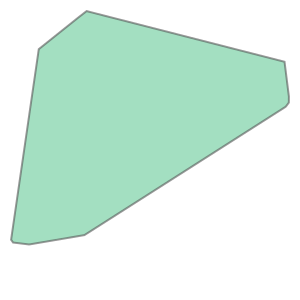

In [11]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [12]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                   1175
m                                                                                   2708
k_avg                                                                            4.60936
intersection_count                                                                   888
streets_per_node_avg                                                             2.58298
streets_per_node_counts                 {0: 0, 1: 287, 2: 14, 3: 779, 4: 93, 5: 1, 6: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.24425531914893617, 2: 0.01191489...
edge_length_total                                                                 395520
edge_length_avg                                                                  146.056
street_length_total                                                               210495
street_length_avg                                                                  139.4
street_segments_count

In [13]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

POINT (549500.8724606866 5634956.199982596)


In [14]:
nodes_proj.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
25418736,5.633889e+06,550714.948657,3,9.720500,50.854473,NaN,NaN,POINT (550714.949 5633889.301)
1672439076,5.633779e+06,550599.221903,3,9.718841,50.853493,NaN,NaN,POINT (550599.222 5633779.165)
835729234,5.633910e+06,550784.818439,4,9.721496,50.854652,NaN,NaN,POINT (550784.818 5633909.867)
25418763,5.634758e+06,550896.446889,3,9.723200,50.862268,NaN,NaN,POINT (550896.447 5634757.878)
1645467926,5.634701e+06,550890.844384,3,9.723112,50.861758,NaN,NaN,POINT (550890.844 5634701.083)


In [15]:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float)

# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)

555311.5526456187


In [16]:
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (555311.5526456187 5635783.45540494)


In [17]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

In [18]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node

286636109

In [19]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node

767082036

In [20]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
286636109,5.634912e+06,549560.163022,3,9.704234,50.863766,NaN,NaN,POINT (549560.163 5634911.569)
767082036,5.635783e+06,555311.552646,1,9.786084,50.871084,NaN,NaN,POINT (555311.553 5635783.455)


In [21]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)

[286636109, 287126449, 1207767969, 2015016999, 257574861, 2015017004, 1207289208, 283039779, 259997121, 253161836, 259997117, 283039910, 283039909, 1244335454, 1719495812, 257569266, 286944638, 1719477035, 1719477040, 29756600, 29756605, 281476731, 29756616, 799530507, 6985157036, 29756646, 807098132, 1170610895, 2577028630, 6985157040, 1170611130, 807098068, 296320406, 1170611212, 1170611076, 1170611015, 29756811, 807097875, 807097873, 29756820, 767082036]


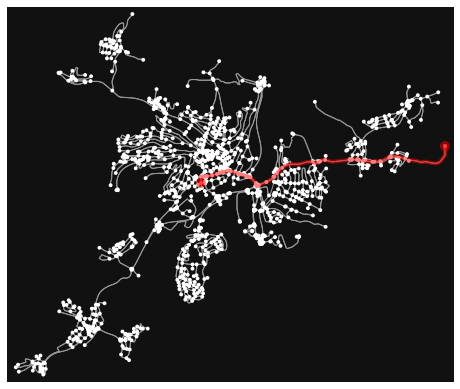

In [22]:
#Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

In [23]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
286636109,5.634912e+06,549560.163022,3,9.704234,50.863766,NaN,NaN,POINT (549560.163 5634911.569)
287126449,5.635061e+06,549557.777412,4,9.704221,50.865107,NaN,NaN,POINT (549557.777 5635060.656)
1207767969,5.635065e+06,549617.445493,3,9.705069,50.865140,NaN,NaN,POINT (549617.445 5635064.929)
2015016999,5.635065e+06,549635.113713,3,9.705320,50.865142,NaN,NaN,POINT (549635.114 5635065.320)
257574861,5.635069e+06,549671.679280,4,9.705840,50.865168,NaN,NaN,POINT (549671.679 5635068.572)
2015017004,5.635073e+06,549706.140074,3,9.706330,50.865201,NaN,NaN,POINT (549706.140 5635072.604)
1207289208,5.635093e+06,549822.789874,3,9.707991,50.865371,NaN,NaN,POINT (549822.790 5635092.627)
283039779,5.635124e+06,549935.231794,3,9.709593,50.865646,NaN,NaN,POINT (549935.232 5635124.211)
259997121,5.635145e+06,549986.239293,3,9.710320,50.865828,NaN,NaN,POINT (549986.239 5635144.919)


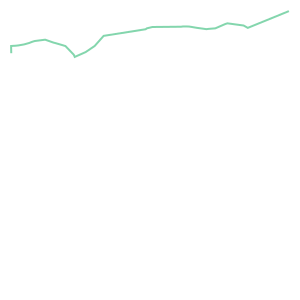

In [24]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [25]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

In [27]:
# Retrieve buildings and reproject
buildings = ox.geometries_from_place(place_name, tags={'building':True})
buildings_proj = buildings.to_crs(crs=edges_proj.crs)

C:\Users\umutb\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\umutb\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


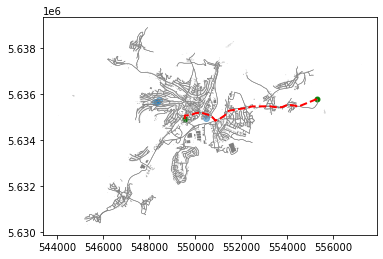

In [28]:
# Plot edges and nodes
ax = edges_proj.plot(linewidth=0.5, color='gray')
ax = nodes_proj.plot(ax=ax, markersize=0, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='black', alpha=0.5)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=24, color='green')